* **Global Weather Repository Dataset** — your comprehensive source for daily weather data from countries and capital cities worldwide.

* A variety of features that reflect the current weather in different places are captured in this dataset.

* `Dataset Characteristics:` Important variables including temperature, humidity, precipitation, wind speed, and atmospheric pressure are all included in the dataset. These characteristics offer a thorough comprehension of the weather trends that impact every area.

* `Dataset Coverage Worldwide:` With information from nations and major cities worldwide, the collection provides a global view of weather patterns and enables climatic comparisons between various locales.

* `Useful Applications of the Dataset:` For developers, academics, and data scientists looking into weather patterns and climate change, this dataset is a priceless tool for learning in-depth information about the environment.



## Data Processing

In [59]:
import pandas as pd
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv")
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [60]:
# Check for missing values in each column
missing_values_per_column = df.isnull().sum()
print("Missing values per column:\n", missing_values_per_column)

# Calculate total missing values in the DataFrame
total_missing_values = missing_values_per_column.sum()

# Check if there are any missing values and print the result
if total_missing_values > 0:
    print(f"Total number missing values: {total_missing_values}")
else:
    print("No missing values are present in the dataset.")


Missing values per column:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone   

In [61]:
# Typos
lf = df[df['timezone']=='Asia/Kolkata']
lf['country'].value_counts()

country
India    171
Inde       1
Name: count, dtype: int64

In [62]:
df['country'] = df['country'].replace('inde', 'india')

In [63]:
# Duplicates
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates:
    # If you want to see the duplicate rows themselves
    duplicate_rows = df[df.duplicated()]
    print("Duplicate rows:\n", duplicate_rows)


Total duplicate rows: 0


In [64]:
# Changing the data types of columns to appropriate data types
df = df.convert_dtypes()
# Convert the 'datetime' column to datetime type
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

# Check the data types after conversion
print(df.dtypes)


country                         string[python]
location_name                   string[python]
latitude                               Float64
longitude                              Float64
timezone                        string[python]
last_updated_epoch                       Int64
last_updated                    datetime64[ns]
temperature_celsius                    Float64
temperature_fahrenheit                 Float64
condition_text                  string[python]
wind_mph                               Float64
wind_kph                               Float64
wind_degree                              Int64
wind_direction                  string[python]
pressure_mb                              Int64
pressure_in                            Float64
precip_mm                              Float64
precip_in                              Float64
humidity                                 Int64
cloud                                    Int64
feels_like_celsius                     Float64
feels_like_fa

In [65]:
# If we want to change the last_updated to data you can change it as follows
# df.rename(columns={last_updated':'date_time'},inplace=True)

# For the sake of uniformity and compatibility we are retaining the same column name
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5,1.52,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [66]:
# Summary statistics for temperature(Average, Maximum, and Minimum Temperatures)
temp_summary=df['temperature_celsius'].describe()
temp_summary

count      33550.0
mean     25.322623
std       7.351903
min          -12.1
25%           21.4
50%           26.3
75%           29.4
max           49.2
Name: temperature_celsius, dtype: Float64

In [67]:
# Summary statistics for humidity(Average, Maximum, and Minimum Temperatures)
temp_summary=df['humidity'].describe()
temp_summary

count      33550.0
mean      61.53225
std      24.928605
min            2.0
25%           42.0
50%           66.0
75%           82.0
max          100.0
Name: humidity, dtype: Float64

In [68]:
df.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,33550.0,33550.0,33550.0,33550,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0,...,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0,33550.0
mean,19.144226,22.152021,1723311459.737705,2024-08-10 19:53:12.840536576,25.322623,77.582134,8.467314,13.630835,175.193085,1012.779314,...,19.929517,467.849984,63.840033,10.877516,7.835957,18.837088,35.705254,1.482146,2.072399,47.954665
min,-41.3,-175.2,1715849100.0,2024-05-16 01:45:00,-12.1,10.3,2.2,3.6,1.0,971.0,...,3.6,-9999.0,0.0,0.0,-9999.0,0.37,0.5,1.0,1.0,0.0
25%,3.75,-6.8361,1719494100.0,2024-06-27 14:15:00,21.4,70.5,4.3,6.8,90.0,1009.0,...,11.1,207.0,35.0,0.7,0.5,3.2,5.7,1.0,1.0,12.0
50%,17.25,23.32,1723379400.0,2024-08-11 15:15:00,26.3,79.3,7.4,11.9,170.0,1013.0,...,18.2,275.65,59.0,2.22,1.665,8.88,15.0,1.0,1.0,48.0
75%,40.4,50.58,1727084700.0,2024-09-23 12:45:00,29.4,84.9,11.9,19.1,260.0,1016.0,...,26.3,413.9,87.3,9.0,5.92,20.0,35.1875,2.0,2.0,83.0
max,64.15,179.22,1730797200.0,2024-11-05 22:00:00,49.2,120.6,1841.2,2963.2,360.0,1045.0,...,2970.4,38879.398,480.7,427.7,291.005,1614.1,1814.4,6.0,10.0,100.0
std,24.490525,65.776259,4377468.075122,NaN,7.351903,13.233546,11.322338,18.221443,100.883809,6.400855,...,19.625306,1040.010796,41.337496,23.021184,57.737265,46.81107,78.468851,0.840437,2.066534,35.115963


In [69]:
# Saving to cleaned_weather.csv 
df.to_csv('cleaned_weather.csv',index=False)

## Data Analytics and Visualization

In [70]:
# Calculate the average temperature for each location
average_temperature_by_location = df.groupby('location_name')['temperature_celsius'].mean()

# Get the top 5 locations with the highest average temperature
top_5_locations = average_temperature_by_location.nlargest(5)

# Print the top 5 locations with the highest average temperature
print("Top 5 Locations with the Highest Average Temperature:")
print(top_5_locations)


Top 5 Locations with the Highest Average Temperature:
location_name
Ar Riyadh            45.0
Kuwait               44.4
Morocco City         40.3
Riyadh          40.244186
Baghdad         40.217341
Name: temperature_celsius, dtype: Float64


In [71]:
top_5_locations = average_temperature_by_location.nsmallest(5)

# Print the top 5 locations with the lowest average temperature
print("Top 5 Locations with the Lowest Average Temperature:")
print(top_5_locations)

Top 5 Locations with the Lowest Average Temperature:
location_name
Santiago          7.264327
Canberra           7.45814
Vestmannaeyjar    8.073529
Grindavik         8.894444
Reykjavik              9.8
Name: temperature_celsius, dtype: Float64


In [72]:
# Example of grouping by region and computing average temperature, humidity, and precipitation
grouped_by_region = df.groupby('timezone')[['temperature_celsius', 'humidity', 'precip_mm']].mean()

# Example of grouping by year (assuming 'last_updated' is in datetime format)
df['year'] = df['last_updated'].dt.year
grouped_by_year = df.groupby('year')[['temperature_celsius', 'humidity', 'precip_mm']].mean()

# Print the grouped summaries
print("\nAverage Weather Data by Region:")
print(grouped_by_region.head())

print("\nAverage Weather Data by Year:")
print(grouped_by_year.head())



Average Weather Data by Region:
                    temperature_celsius   humidity  precip_mm
timezone                                                     
Africa/Accra                  27.911494  75.724138   0.091437
Africa/Addis_Ababa            20.475439   59.28655   0.601287
Africa/Algiers                27.940116  52.744186   0.007791
Africa/Asmara                 22.835838  43.982659   0.290462
Africa/Bamako                      30.4  62.127168   0.183006

Average Weather Data by Year:
      temperature_celsius  humidity  precip_mm
year                                          
2024            25.322623  61.53225   0.157143


In [73]:
# Please note that for year there is only 1 entry 2024 so standard deviation does not exists
print("Statistics of Weather Data by Region:")
print(grouped_by_region.describe())

print("\n Statistics of  Weather Data by Year:")
print(grouped_by_year.describe())

Statistics of Weather Data by Region:
       temperature_celsius   humidity  precip_mm
count                190.0      190.0      190.0
mean             25.084558  62.684664   0.158761
std               5.972011  20.609172   0.194368
min               7.264327   9.901734        0.0
25%              22.257028  48.595031   0.028077
50%              26.359172  66.648154   0.107762
75%              28.557456  79.787268   0.191916
max              40.271676   95.12426       1.55

 Statistics of  Weather Data by Year:
       temperature_celsius  humidity  precip_mm
count                  1.0       1.0        1.0
mean             25.322623  61.53225   0.157143
std                   <NA>      <NA>       <NA>
min              25.322623  61.53225   0.157143
25%              25.322623  61.53225   0.157143
50%              25.322623  61.53225   0.157143
75%              25.322623  61.53225   0.157143
max              25.322623  61.53225   0.157143


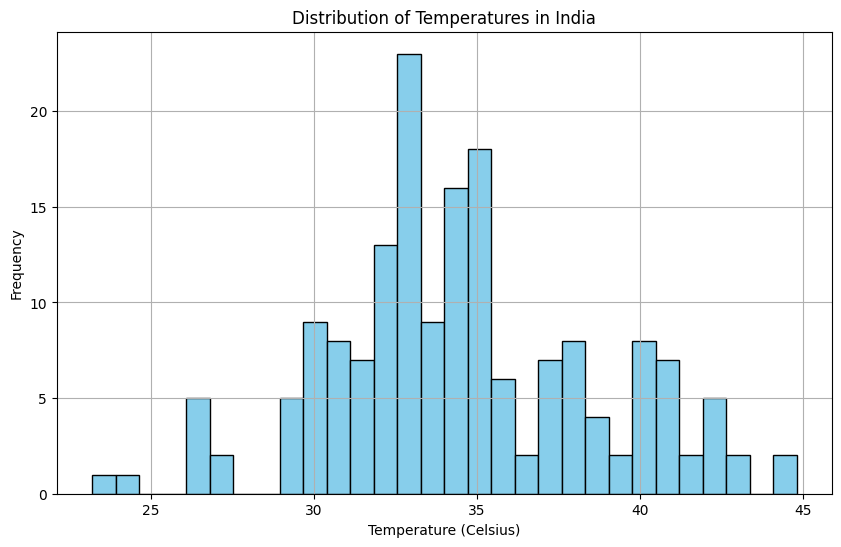

In [74]:
import matplotlib.pyplot as plt
# Filter data 
special_group = df.groupby('timezone')[['temperature_celsius', 'humidity', 'precip_mm','last_updated']]
India_data = special_group.get_group('Asia/Kolkata')

# Plot a histogram for temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(India_data['temperature_celsius'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperatures in India')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

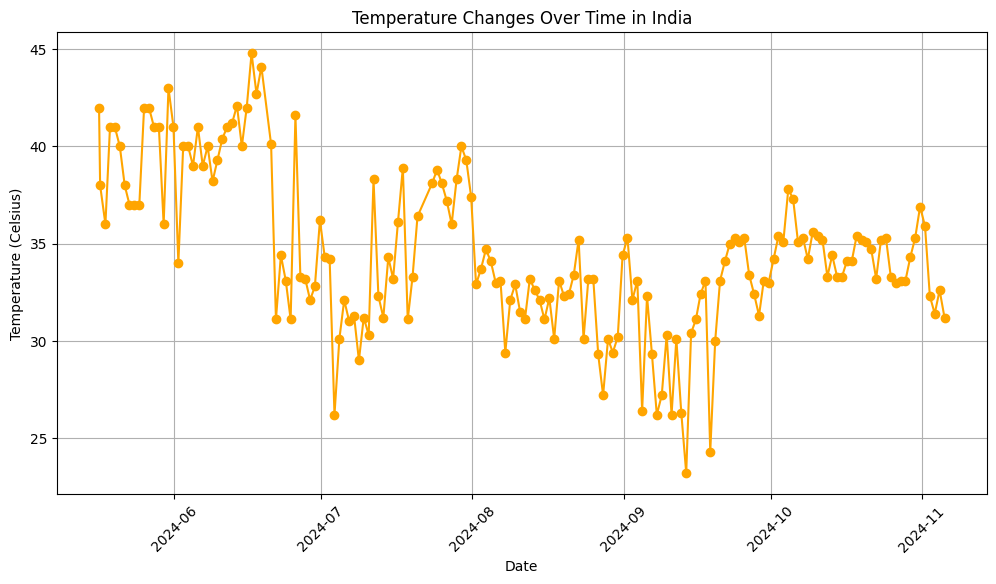

In [75]:
# Plot temperature changes over time for the India
plt.figure(figsize=(12, 6))
plt.plot(India_data['last_updated'], India_data['temperature_celsius'], marker='o', color='orange')
plt.title('Temperature Changes Over Time in India')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
